# IMPORTS

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
plt.style.use('seaborn')

# READ THE DATA

In [3]:
df = pd.read_csv('./input/melbourne_housing.csv')

In [4]:
df.shape

(13580, 21)

# MAIN EDA BLOCK

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df.dropna(inplace=True)

# CORRELATION PLOTTING

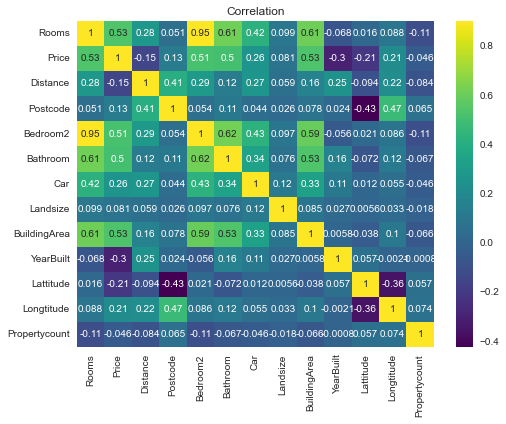

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), vmax=0.9, cmap='viridis', annot=True)
plt.title('Correlation')
plt.show()

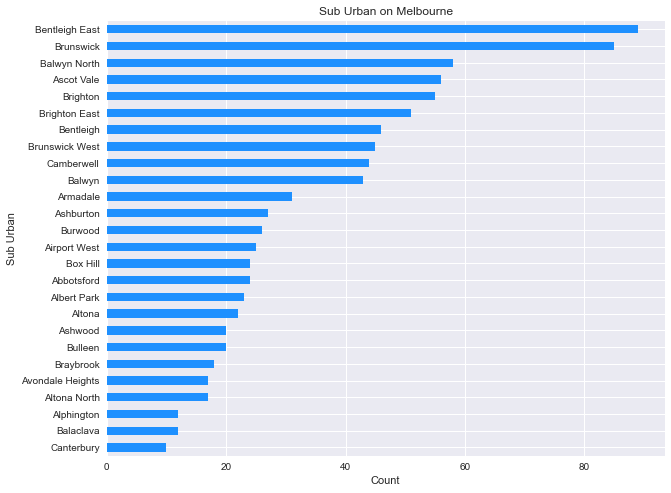

In [10]:
plt.figure(figsize=(10,8))
df['Suburb'][0:900].value_counts().sort_values().plot(kind='barh', color='dodgerblue')
plt.xlabel('Count')
plt.ylabel('Sub Urban')
plt.title('Sub Urban on Melbourne')
plt.rcParams.update({'font.size': 5})
plt.show()

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


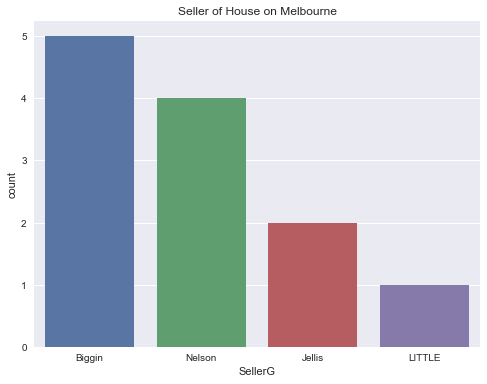

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df['SellerG'][:12])
plt.title('Seller of House on Melbourne')
plt.show()

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


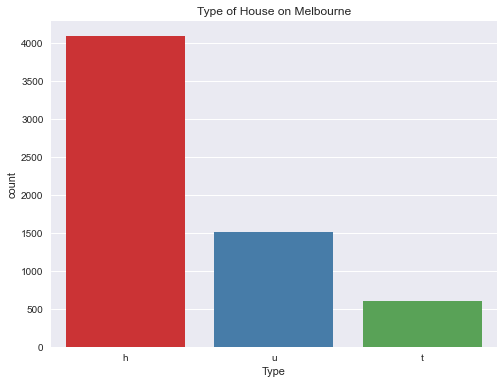

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(df['Type'], palette='Set1')
plt.title('Type of House on Melbourne')
plt.show()

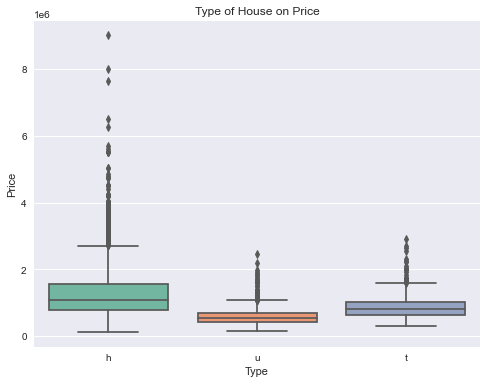

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Type', y='Price', palette='Set2')
plt.title('Type of House on Price')
plt.show()

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


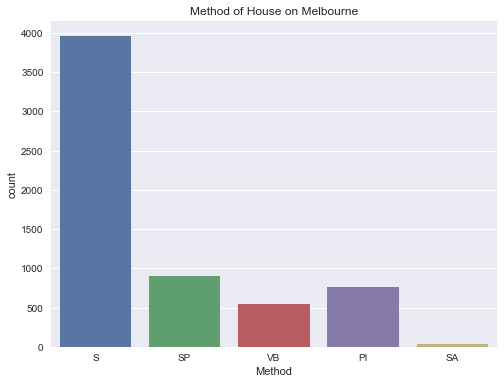

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(df['Method'])
plt.title('Method of House on Melbourne')
plt.show()

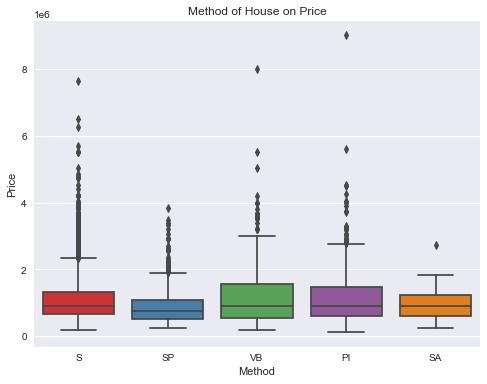

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Method', y='Price', palette='Set1')
plt.title('Method of House on Price')
plt.show()

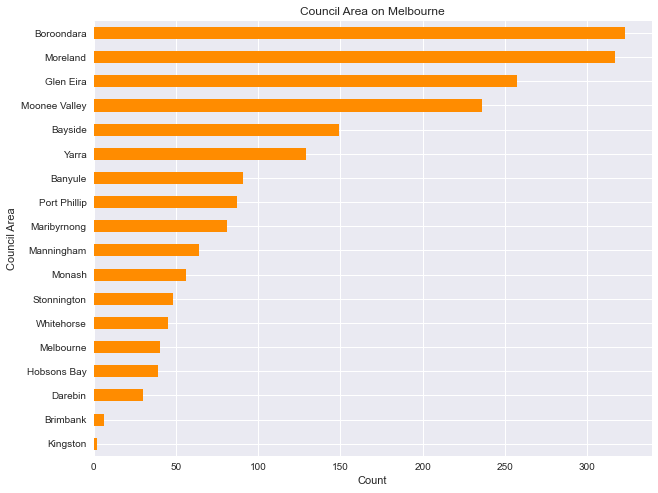

In [16]:
plt.figure(figsize=(10,8))
df['CouncilArea'][:2000].value_counts().sort_values().plot(kind='barh', color='darkorange')
plt.xlabel('Count')
plt.ylabel('Council Area')
plt.title('Council Area on Melbourne')
plt.rcParams.update({'font.size': 5})
plt.show()


C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


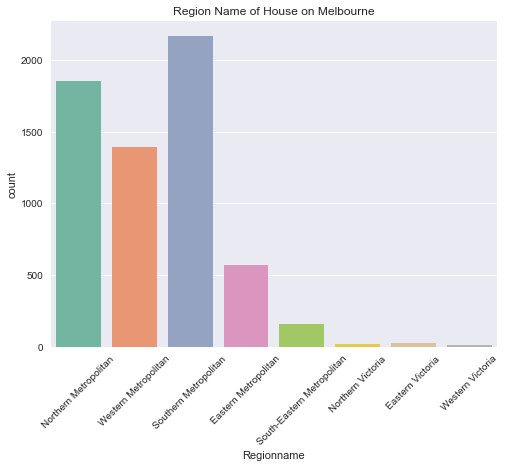

In [17]:
plt.figure(figsize=(8,6))
chart = sns.countplot(df['Regionname'], palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Region Name of House on Melbourne')
plt.show()

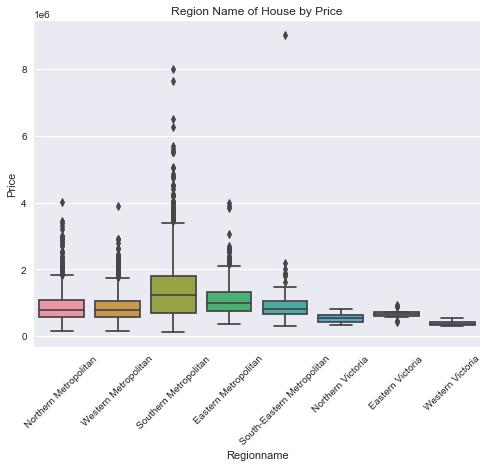

In [18]:
plt.figure(figsize=(8,6))
chart = sns.boxplot(data=df, x='Regionname', y='Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Region Name of House by Price')
plt.show()

In [19]:
for i in df.columns.tolist():
    df[i] = df[i].astype('category').cat.codes
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,2790,1,0,839,1,18,41,12,50,...,0,0,110,85,23,29,1712,1839,2,135
2,0,4520,2,0,1118,3,18,42,12,50,...,1,0,88,224,23,29,1690,1854,2,135
4,0,4882,3,0,1174,4,112,43,12,50,...,0,2,74,212,130,29,1722,1851,2,135
6,0,1027,2,0,1291,1,112,47,12,50,...,1,0,198,313,32,29,1788,1932,2,135
7,0,6101,1,0,1193,1,112,48,12,50,...,0,2,209,143,17,29,1737,1869,2,135


In [21]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Shapes: \nX_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

Shapes: 
X_train: (4337, 20)
X_test: (1859, 20)
y_train: (4337,)
y_test: (1859,)


In [22]:
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

Wall time: 771 ms


0.7975148131465111

In [23]:
y_pred = lr.predict(X_test)
y_pred

array([ 904.34726138,  452.78533275,  847.02251101, ...,  121.90508042,
       1015.86250292,  713.22089852])

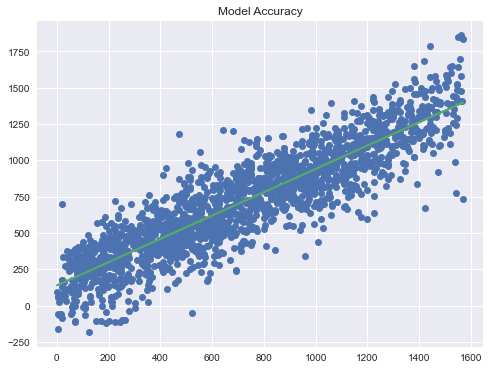

In [24]:
x = y_test
y = y_pred
plt.figure(figsize=(8,6))
plt.title('Model Accuracy')
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


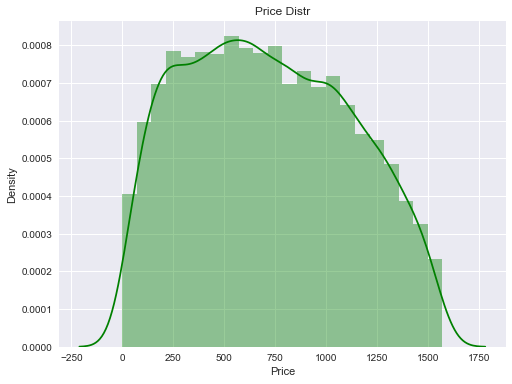

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'], color='g')
plt.title('Price Distr')
plt.show()

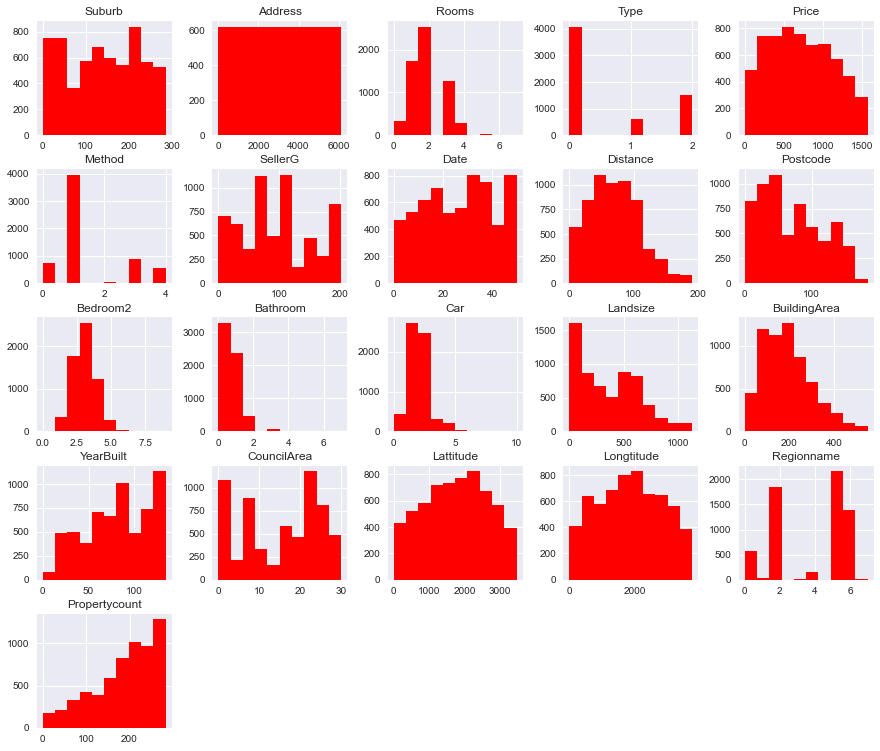

In [26]:
df.hist(figsize=(15,13), color='r')
plt.show()